In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\Susan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [0]:
### Q. Read the bank dataset 

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [0]:
### Data transformation
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [0]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [0]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

### Data preparation

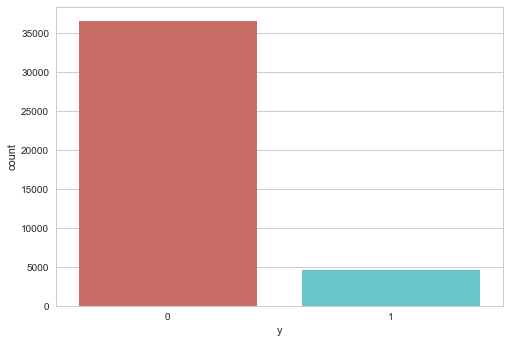

In [0]:
### Q. Find out in the target column what is the respective count of values
### Q. Also plot the values of y in form of a bar graph

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

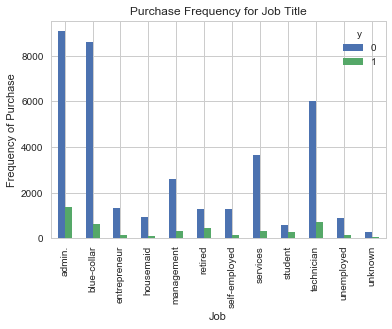

In [0]:
## Create a visualization as shown below for variable 'job' and frequency of purchase

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

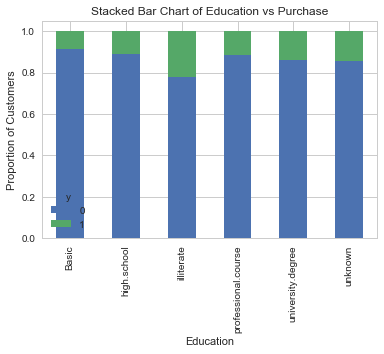

In [0]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers



Education seems a good predictor of the outcome variable.

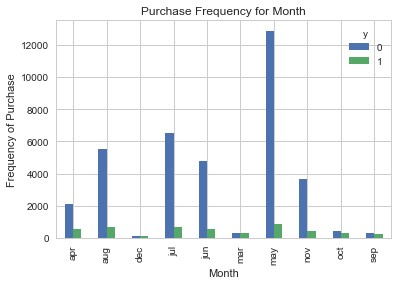

In [0]:
## Q. Write code for the visualization as shown below

Month might be a good predictor of the outcome variable

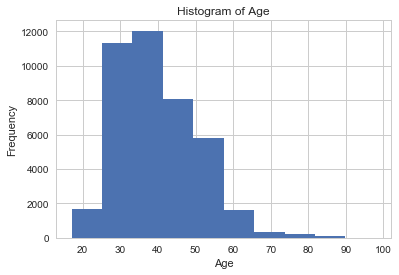

In [0]:
## Q. Write code for the visualization as shown below

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [0]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


### Feature Selection

In [ ]:
## Find the best posible features using feature engineering techniques. 

For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [0]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

### XG Boost based Model Fitting

In [1]:
## Write code to implement XG Boost module by training the X,Y variables and perform prediction on the Test dataset.

### Confusion Matrix

In [3]:
## Create the confusion matrix

### Accuracy

In [4]:
## Find the accuracy of your model

### Multi-Threading

In [ ]:
## Evaluate the effect of number of threads

Confirm that XGBoost multi-threading support is working by building a number of different XGBoost models, 
specifying the number of threads and timing how long it takes to build each model.

Note - By default this parameter (n-thread) is set to -1 to make use of all of the cores in your system.

In [ ]:
## Plot a graph between XGBoost training speed Vs. Number of Threads.

Analyze the improvement in the running time for each new thread.

### Cross-validation

In [ ]:
## Disable multi-threading support in XGBoost and allow 10-fold cross validation to run on all cores.

In [ ]:
Single Thread XGBoost, Parallel Thread CV

In [ ]:
## Disable multi-threading support in cross validation and allow XGBoost to run on all cores.

In [ ]:
Parallel Thread XGBoost, Single Thread CV

In [ ]:
## Enable multi-threading support for both XGBoost and Cross validation.

In [ ]:
Parallel Thread XGBoost and CV

In [ ]:
## Plot a bar graph to compare the results of parallelizing the XGBoost over cross validation folds.

In [ ]:
## Train the model and plot best possible ROC and AUC graphs.

### Model Deployment

Production typically means an end-point in the form of an API that the end-user can access. For Python, many options are available such as Flask, Falcon, Starlette, Sanic, FastAPI, Tornado, etc.

Note - 
pip install fastapi
pip install uvicorn

#### Case - 1

In [ ]:
## Save your finalized model and features (X, y) using joblib or pickel.

In [ ]:
## Create a class called 'Data' which defines all variables used in the model. 

This helps in tracking the variables that we use but also creates documentation based on the class that we made.

In [ ]:
## Create a method to load all the input features, model and return the prediction value of the target variable.

### Conclusion

You can load the server with the following command from console --
<b>uvicorn main:app </b>
    
Although your API can technically now be used in production, it would be helpful to include documentation, log what happens in your API, and to containerize your solution.

#### Case 2

In [ ]:
## Model deployment through flask

 -- In order to collect the data in an organised manner, create a HTML form which would contain all the different options to select from each attribute.

In [ ]:
## Import Flask and create folder templates which will be used to render HTML displays in user's browser. 

In [ ]:
## Run Flask application and launch a simple server. (http://127.0.0.1:5000)

In [ ]:
## Load the model and predict target values. (When someone submits the form, the webpage should display the predicted value of )

#### Case - 3

In [ ]:
## Deploy the model using MLflow tracking server and docker which can be used to package model development workflow into a reusable, parameterized module.

ML Flow is an open source suite of tools that help manage the ML model development lifecycle.

### Miscellaneous 

 <b>Ques 1 </b><br>
Consider a Pandas dataframe with random integers (3 x 10). 
<br>
(i) Write a function 'cubes' such that it takes two at a time and calculate - $ (a)^3 + (b)^3  $
<br>
(ii) Use Multiprocessing and apply the 'cubes' function on each row, but running 4 processes at a time.

<b> Ques 2 </b> <br>
Use Pool.map() to run the following python scripts in parallel.
Script names: ‘script1.py’, ‘script2.py’, ‘script3.py’

<b> Ques 3 </b> <br>
Normalize each row of 2d array (list) to vary between 0 and 1.

list_a = [[2, 3, 4, 5], [6, 9, 10, 12], [11, 12, 13, 14], [21, 24, 25, 26]]

<b> Ques 4 </b> <br>
Use Pool.apply() to get the row wise common items in list_a and list_b. <br>

list_a = [[1, 2, 3], [5, 6, 7, 8], [10, 11, 12], [20, 21]] <br>
list_b = [[2, 3, 4, 5], [6, 9, 10], [11, 12, 13, 14], [21, 24, 25]]

<b> Ques 5 </b><br> 
What is the method that wakes up all thread waiting for the condition? 
1. notify() <br>
2. notifyAll() <br>
3. release() <br>
4. releaseAll() <br>


<b> Ques 6 </b><br> 
What is the exception raised for an error that doesn’t fall in any of the categories?
1. ReferenceError <br>
2. RuntimeError <br>
3. SystemError <br>
4. LookupError <br>

<b> Ques 7 </b><br> 
How does global value mutation used for thread-safety? 
1. None <br>
2. via Locking <br>
3. via GIL (Global Interpreter Lock) <br>
4. via Mutex <br>

<b> Ques 8 </b><br> 
What is the method to retrieve the list of all active threads?
1. enumerate() <br>
2. getList() <br>
3. threads() <br>
4. getThreads() <br>

<b> Ques 9 </b><br> 
Consider a list a = ['red', 'green', 'blue', 'black']. Use multiprocessing module Queue to put list data into queue and pop out using queue.get()

<b> Ques 10 </b><br> 
Suppose we have some tasks to accomplish. To get that task done, we will use several processes. So, we will maintain two queue. One will contain the tasks and the other will contain the log of completed task.

Then we instantiate the processes to complete the task. Write a Python script to add tasks to the queue, then creating processes and starting them, then using join( ) to complete the processes.
Also, print the log from the second queue.

### References --

1. XG Boost tutorial -- https://acadgild.com/blog/xgboost-python

2. Feature Engineering -- https://www.kaggle.com/learn/feature-engineering

3. XGBoost parameters (nthread) -- https://xgboost.readthedocs.io/en/latest/parameter.html

4. Introduction to threading in Python -- https://realpython.com/intro-to-python-threading/

5. Parallelism in python -- https://www.toptal.com/python/beginners-guide-to-concurrency-and-parallelism-in-python

6. Fast API -- https://fastapi.tiangolo.com/

7. Uvicorn -- https://www.uvicorn.org/

8. Model deployment through Flask -- https://www.geeksforgeeks.org/deploy-machine-learning-model-using-flask/

9. MLFlow projects -- 9. https://mlflow.org/docs/latest/projects.html

10. ML model deployment (re-usability) -- https://christophergs.com/machine%20learning/2019/03/17/how-to-deploy-machine-learning-models/